### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [2]:
import yfinance as yf
from yahoofinancials import YahooFinancials

### Download the stocks data of Apple.inc from yahoo financials

In [3]:
aapl_df = yf.download('AAPL', start = '2013-01-01',
                     end = '2023-07-01', progress = False)

In [4]:
aapl_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.813860,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.601631,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.139202,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,16.044262,484156400
2013-01-08,18.900356,18.996071,18.616072,18.761070,16.087444,458707200
...,...,...,...,...,...,...
2023-06-26,186.830002,188.050003,185.229996,185.270004,185.270004,48088700
2023-06-27,185.889999,188.389999,185.669998,188.059998,188.059998,50730800
2023-06-28,187.929993,189.899994,187.600006,189.250000,189.250000,51216800


In [5]:
aapl_df.shape

(2642, 6)

In [6]:
aapl_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2642 entries, 2013-01-02 to 2023-06-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2642 non-null   float64
 1   High       2642 non-null   float64
 2   Low        2642 non-null   float64
 3   Close      2642 non-null   float64
 4   Adj Close  2642 non-null   float64
 5   Volume     2642 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 144.5 KB


In [7]:
#Check the missing values
aapl_df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

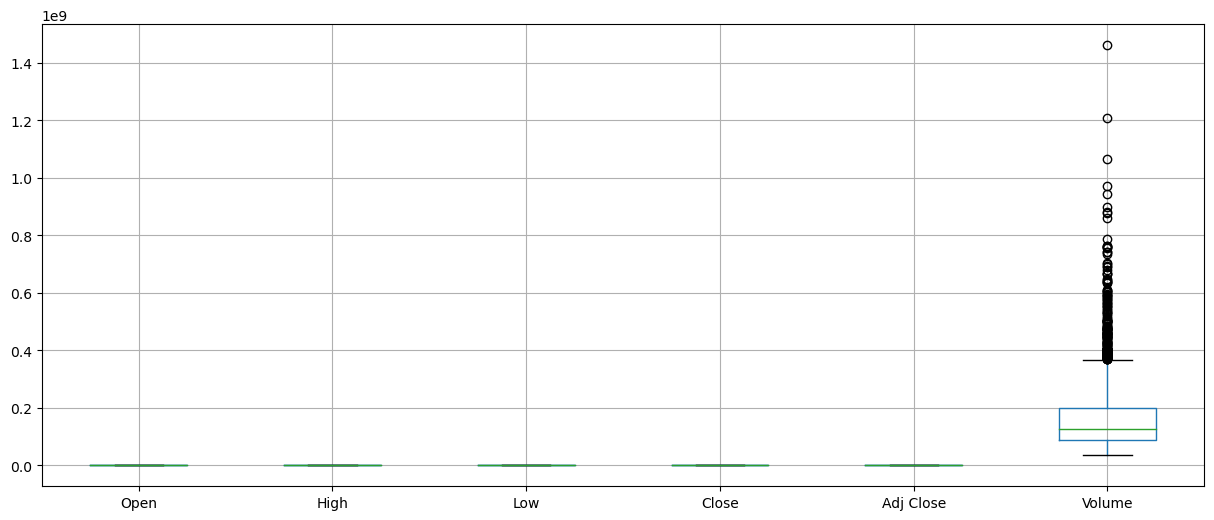

In [8]:
#Outliers check
aapl_df.boxplot()
plt.show()

In [9]:
#Let's take the one feature that I want to do my analysis i.e., Close
aapl_df2 = aapl_df['Close']

In [10]:
aapl_df2.head()

Date
2013-01-02    19.608213
2013-01-03    19.360714
2013-01-04    18.821428
2013-01-07    18.710714
2013-01-08    18.761070
Name: Close, dtype: float64

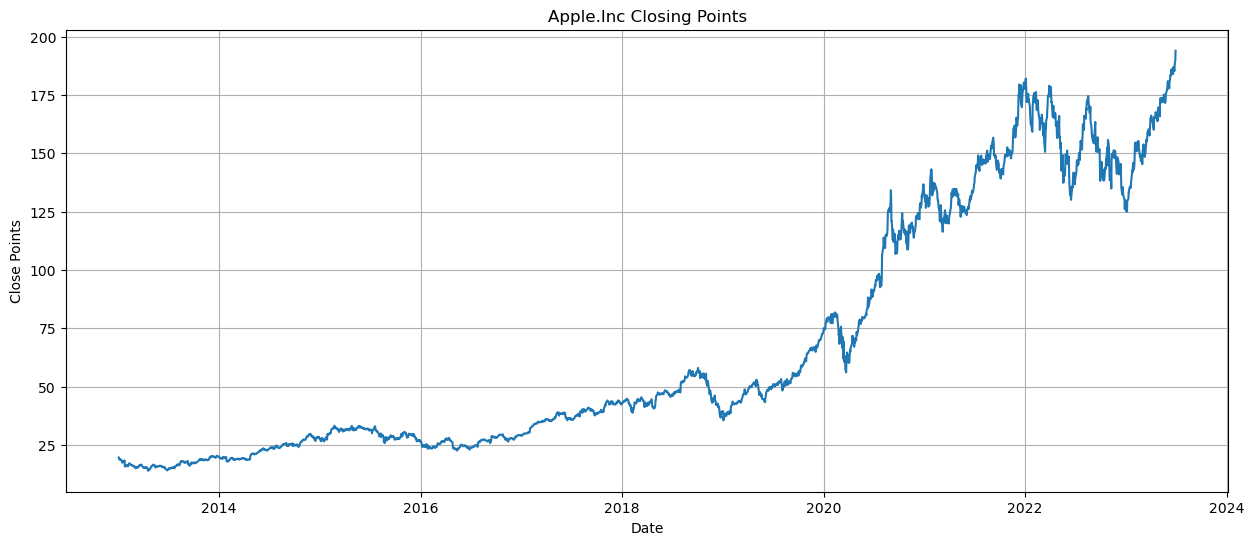

In [11]:
#Plot the Closing points of Apple.inc
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Points')
plt.plot(aapl_df['Close'])
plt.title('Apple.Inc Closing Points')
plt.show()

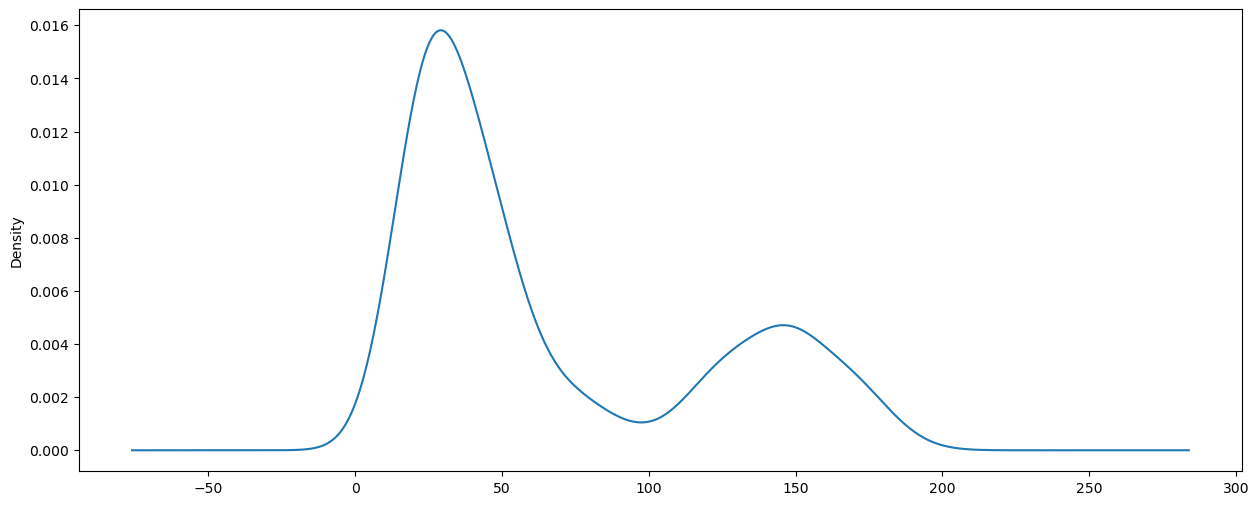

In [12]:
#Distribution of the dataset
aapl_df['Close'].plot(kind = 'kde')
plt.show()

In [13]:
#Import the statistic tools
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
aapl_df2

Date
2013-01-02     19.608213
2013-01-03     19.360714
2013-01-04     18.821428
2013-01-07     18.710714
2013-01-08     18.761070
                 ...    
2023-06-26    185.270004
2023-06-27    188.059998
2023-06-28    189.250000
2023-06-29    189.589996
2023-06-30    193.970001
Name: Close, Length: 2642, dtype: float64

In [228]:
#Decompose the data to find Trend, Seasonality & Residuals
decomposition = seasonal_decompose(aapl_df2, model = 'multiplicative', period = 120)

In [229]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

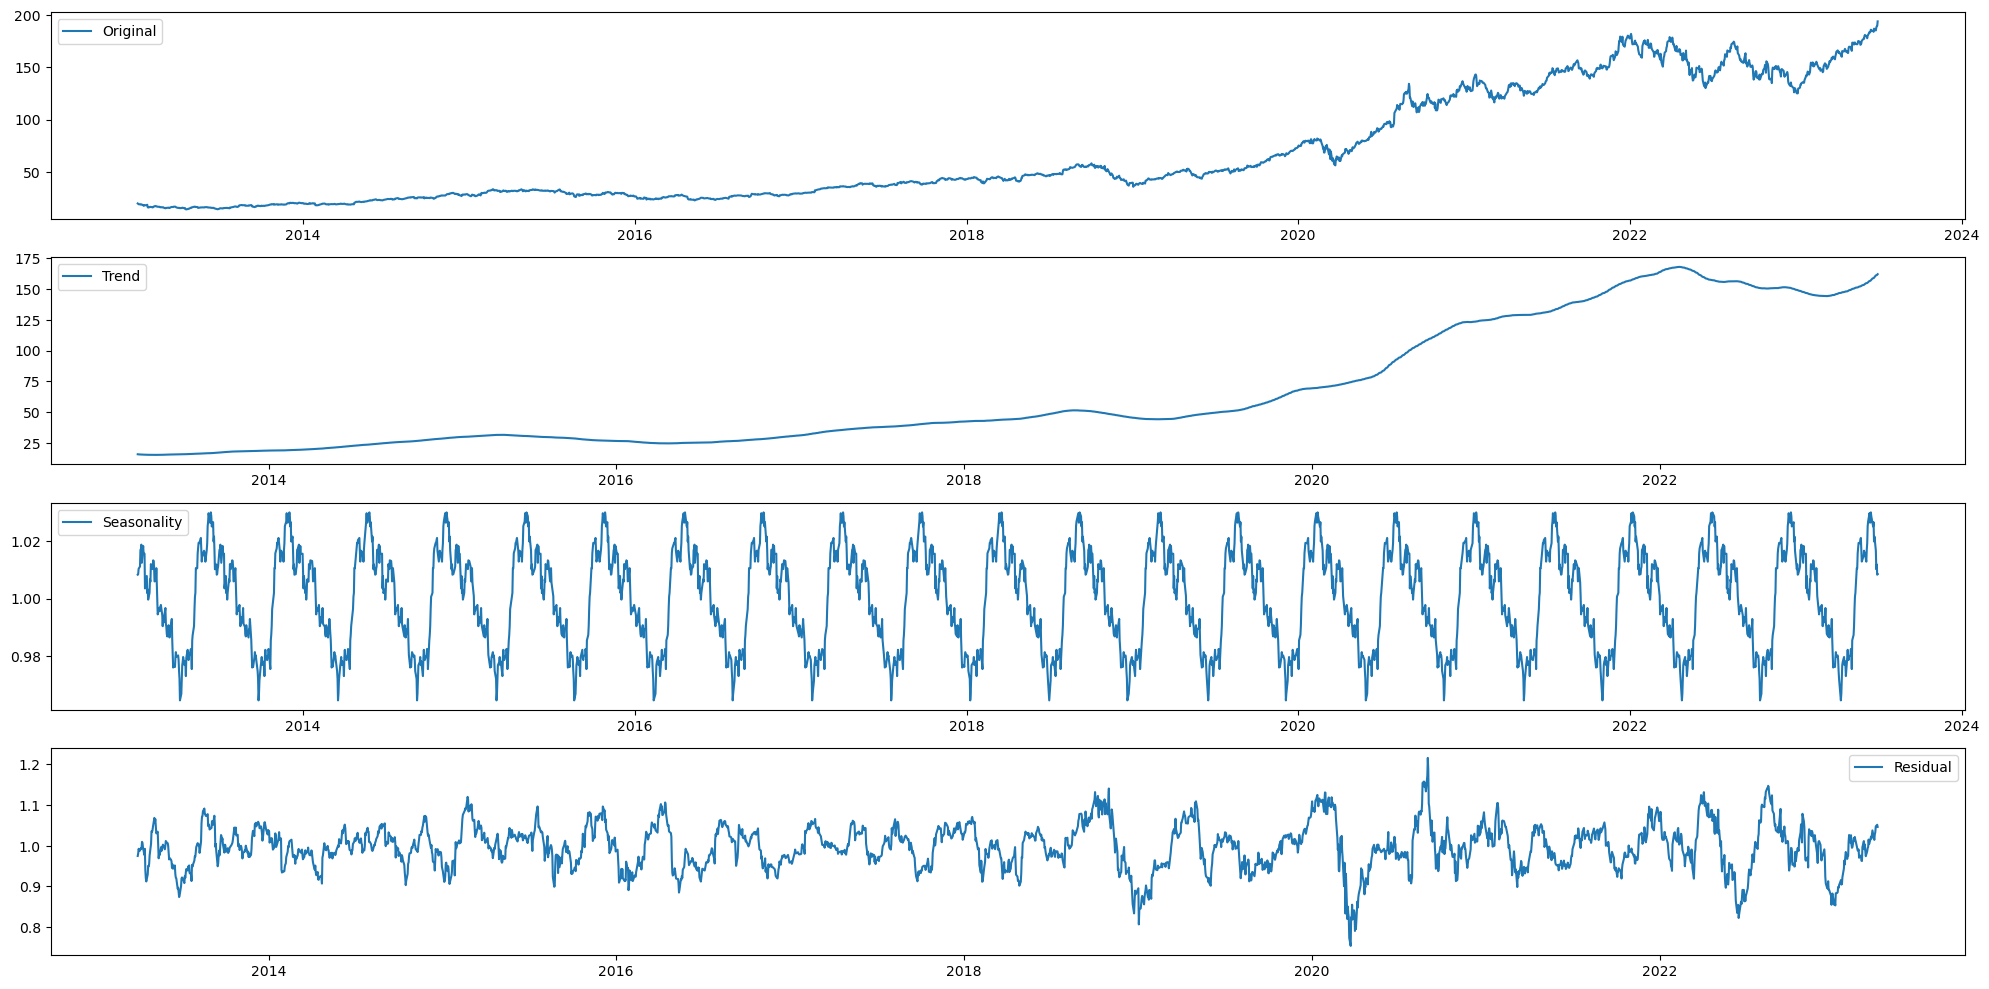

In [230]:
#Visualization
plt.figure(figsize=(20,10))
plt.subplot(411)
plt.plot(aapl_df2,label = 'Original')
plt.legend(loc = 'best')
plt.subplot(412)
plt.plot(trend,label = 'Trend')
plt.legend(loc = 'best')
plt.subplot(413)
plt.plot(seasonality,label = 'Seasonality')
plt.legend(loc = 'best')
plt.subplot(414)
plt.plot(residual,label = 'Residual')
plt.legend(loc = 'best')
plt.tight_layout()

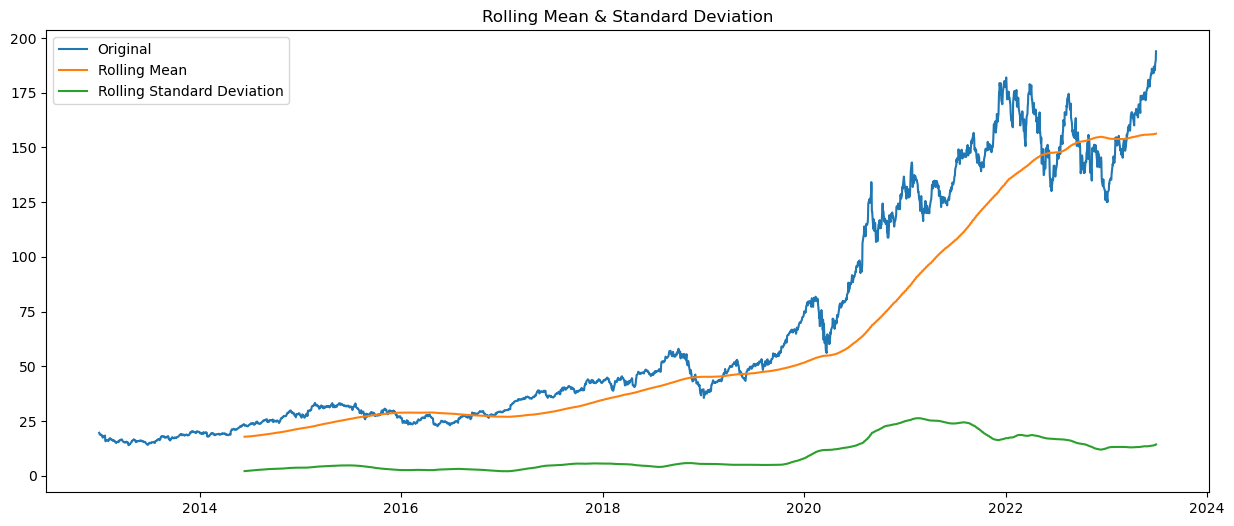

In [163]:
#Determing rolling statistics
rolmean = aapl_df2.rolling(window=365).mean()
rolstd = aapl_df2.rolling(window=365).std()

#Plot rolling statistics:
orig = plt.plot(aapl_df2, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Standard Deviation')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [31]:
#Import the library for Augmented Dickey Fuller Test
from statsmodels.tsa.stattools import adfuller

#### Let's run Dickey Fuller Test and check whether my data is STATIONARY. 
#### Null Hypothesis, H0 = Data is not stationary
#### Alternate Hypothesis, Ha = Data is stationary

In [32]:
print('Results of Dickey-Fuller Test:')
adftest = adfuller(aapl_df2, autolag='AIC')
adfoutput = pd.Series(adftest[0:4], index=['Test Statistic', 'P-value', 'Lags Used', 'Number of Observations Used'])
for key, value in adftest[4].items():
    adfoutput['Critical Value (%s)'%key] = value
print(adfoutput)

Results of Dickey-Fuller Test:
Test Statistic                    0.818473
P-value                           0.991929
Lags Used                        22.000000
Number of Observations Used    2619.000000
Critical Value (1%)              -3.432849
Critical Value (5%)              -2.862644
Critical Value (10%)             -2.567358
dtype: float64


### It is clear that p-value is high. Hence the null hypothesis is accepted. The data is Not Stationary.
#### Let's make the data stationary by using log transformation

In [33]:
#Transform the data using log transformation to smoothen the data points
ts_log = np.log(aapl_df2)

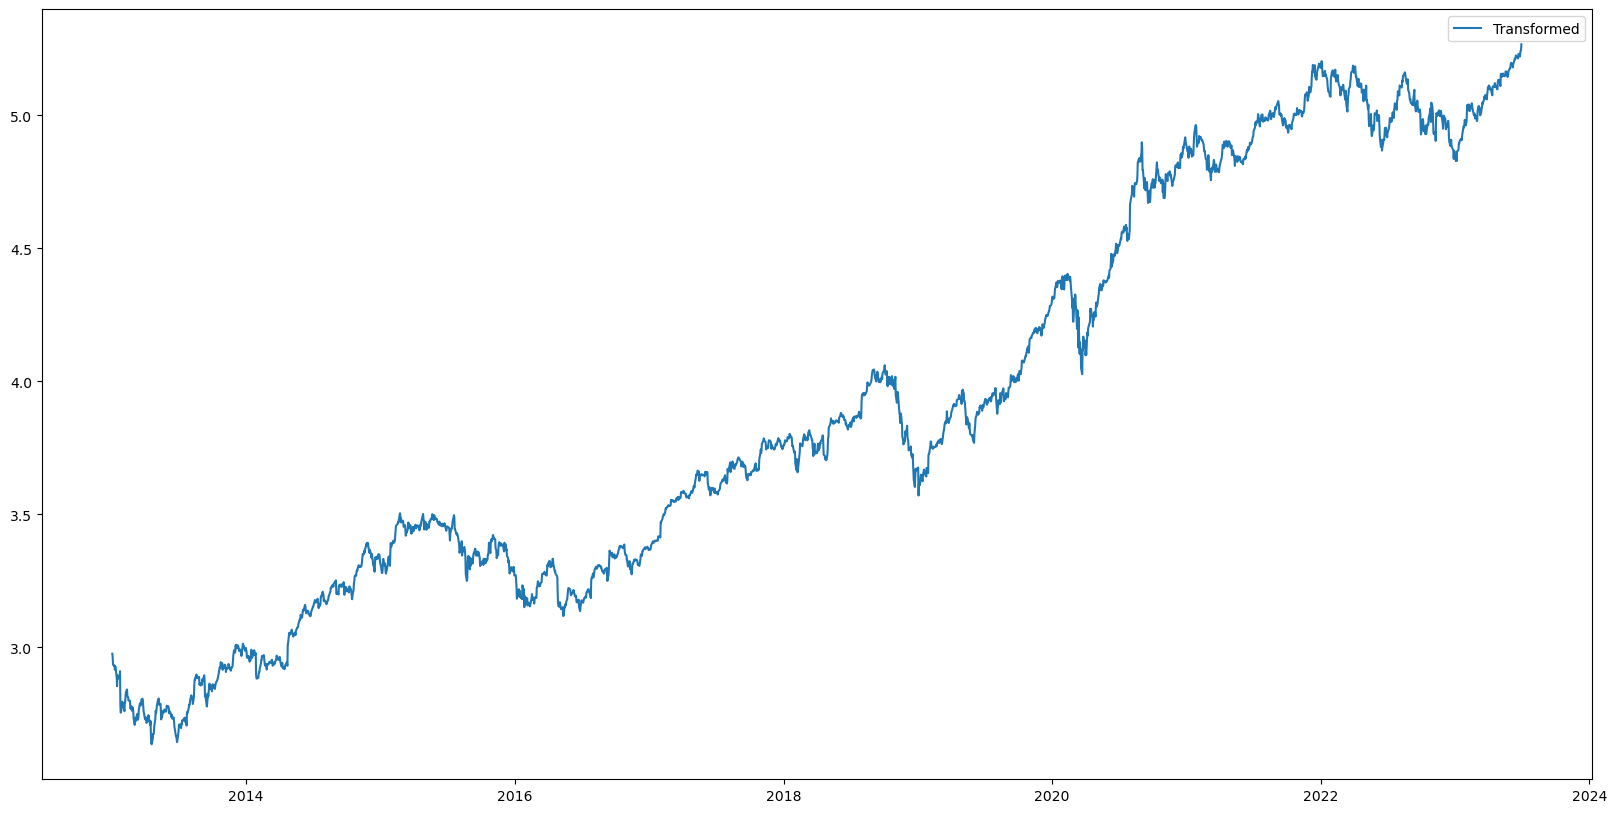

In [34]:
#Let's visualize now
plt.figure(figsize=(20,10))
plt.plot(ts_log, label = 'Transformed')
plt.legend(loc = 'best')
plt.show()

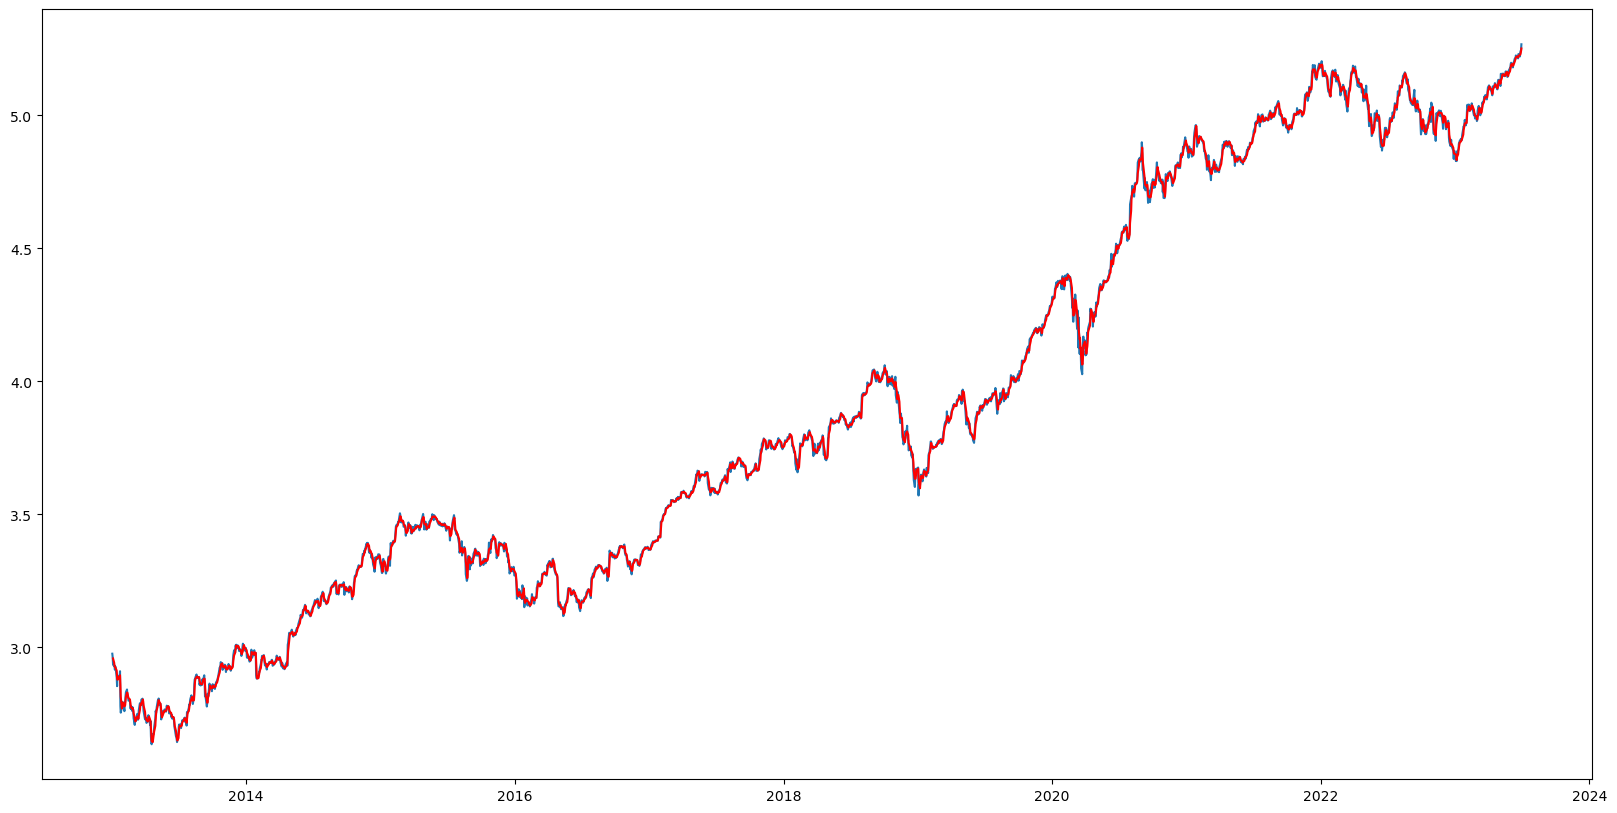

In [35]:
#Moving average of 3 days for smoothening
plt.figure(figsize=(20,10))
moving_avg = ts_log.rolling(3).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')
plt.show()

In [36]:
#Running the ADF test again after smoothening the data

print('Results of Dickey-Fuller Test:')
adf_test_1 = adfuller(ts_log, autolag='AIC')
adfoutput2 = pd.Series(adf_test_1[0:4], index=['Test Statistic', 'P-value', 'Lags Used', 'Number of Observations Used'])
for key, value in adf_test_1[4].items():
    adfoutput2['Critical Value (%s)'%key] = value
print(adfoutput2)

Results of Dickey-Fuller Test:
Test Statistic                   -0.073959
P-value                           0.951971
Lags Used                         9.000000
Number of Observations Used    2632.000000
Critical Value (1%)              -3.432837
Critical Value (5%)              -2.862639
Critical Value (10%)             -2.567355
dtype: float64


#### Still p-value is high. Data is Not Stationary.

In [37]:
#Removing Trend from the original data points
ts_log_moving_avg = ts_log - moving_avg

In [38]:
ts_log_moving_avg

Date
2013-01-02         NaN
2013-01-03         NaN
2013-01-04   -0.023067
2013-01-07   -0.013350
2013-01-08   -0.000175
                ...   
2023-06-26   -0.005625
2023-06-27    0.007437
2023-06-28    0.009187
2023-06-29    0.003299
2023-06-30    0.015825
Name: Close, Length: 2642, dtype: float64

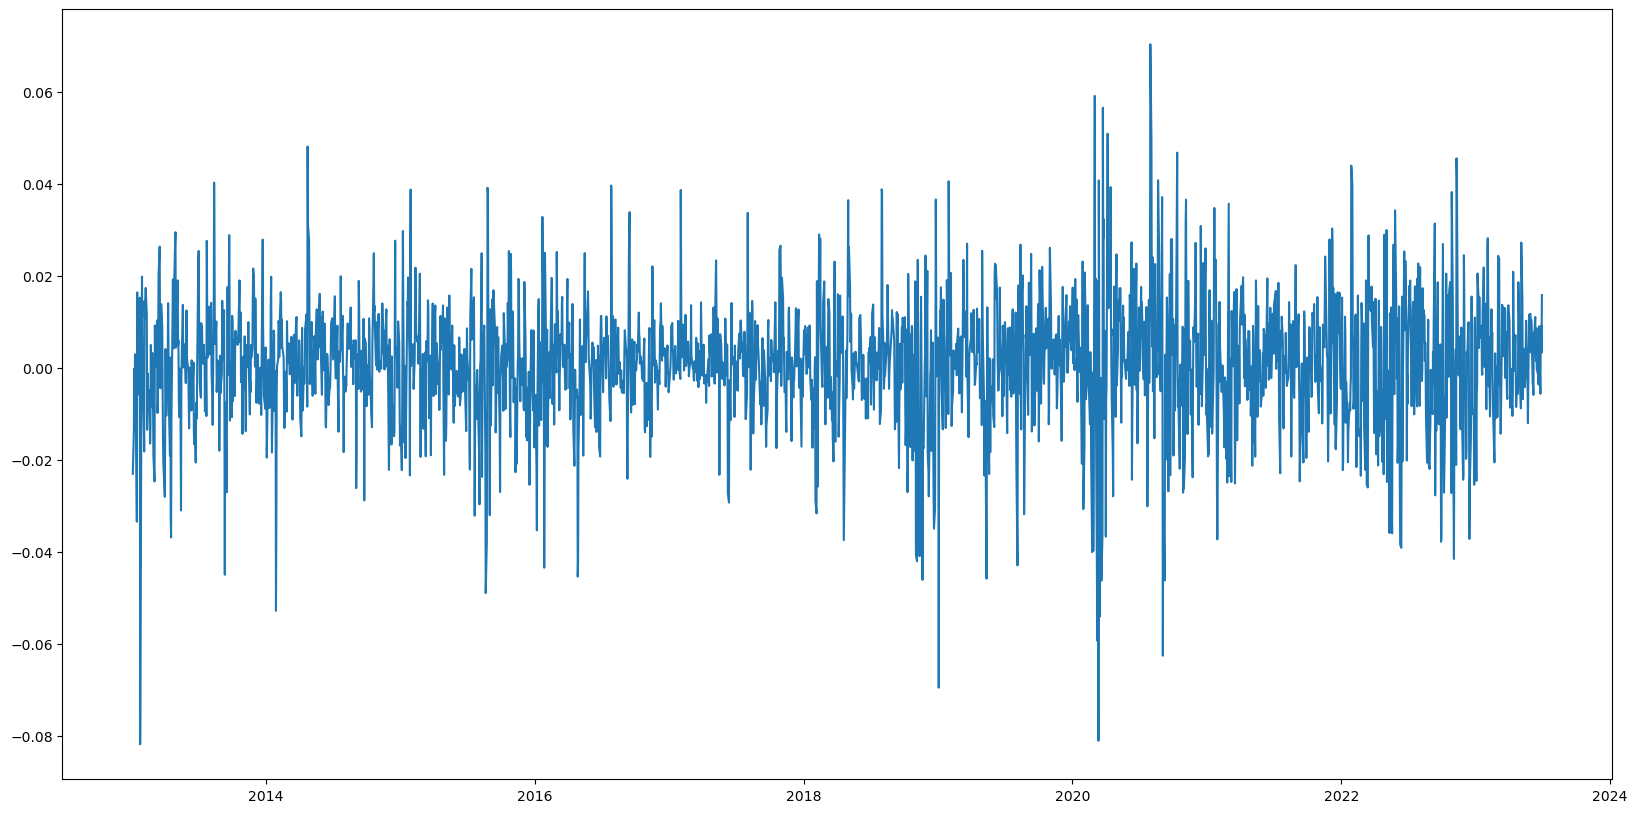

In [39]:
plt.figure(figsize=(20,10))
plt.plot(ts_log_moving_avg)
plt.show()

In [40]:
#Drop the null values
ts_log_moving_avg.dropna(inplace=True)

In [41]:
#ADF test after smoothening the data

print('Results of Dickey-Fuller Test:')
adf_test_2 = adfuller(ts_log_moving_avg, autolag='AIC')
adfoutput3 = pd.Series(adf_test_2[0:4], index=['Test Statistic', 'P-value', 'Lags Used', 'Number of Observations Used'])
for key, value in adf_test_2[4].items():
    adfoutput3['Critical Value (%s)'%key] = value
print(adfoutput3)

Results of Dickey-Fuller Test:
Test Statistic                -1.469788e+01
P-value                        2.978480e-27
Lags Used                      1.000000e+01
Number of Observations Used    2.629000e+03
Critical Value (1%)           -3.432840e+00
Critical Value (5%)           -2.862640e+00
Critical Value (10%)          -2.567356e+00
dtype: float64


### Test statistic is Negative and P-value is Low. Now the data is stationary.

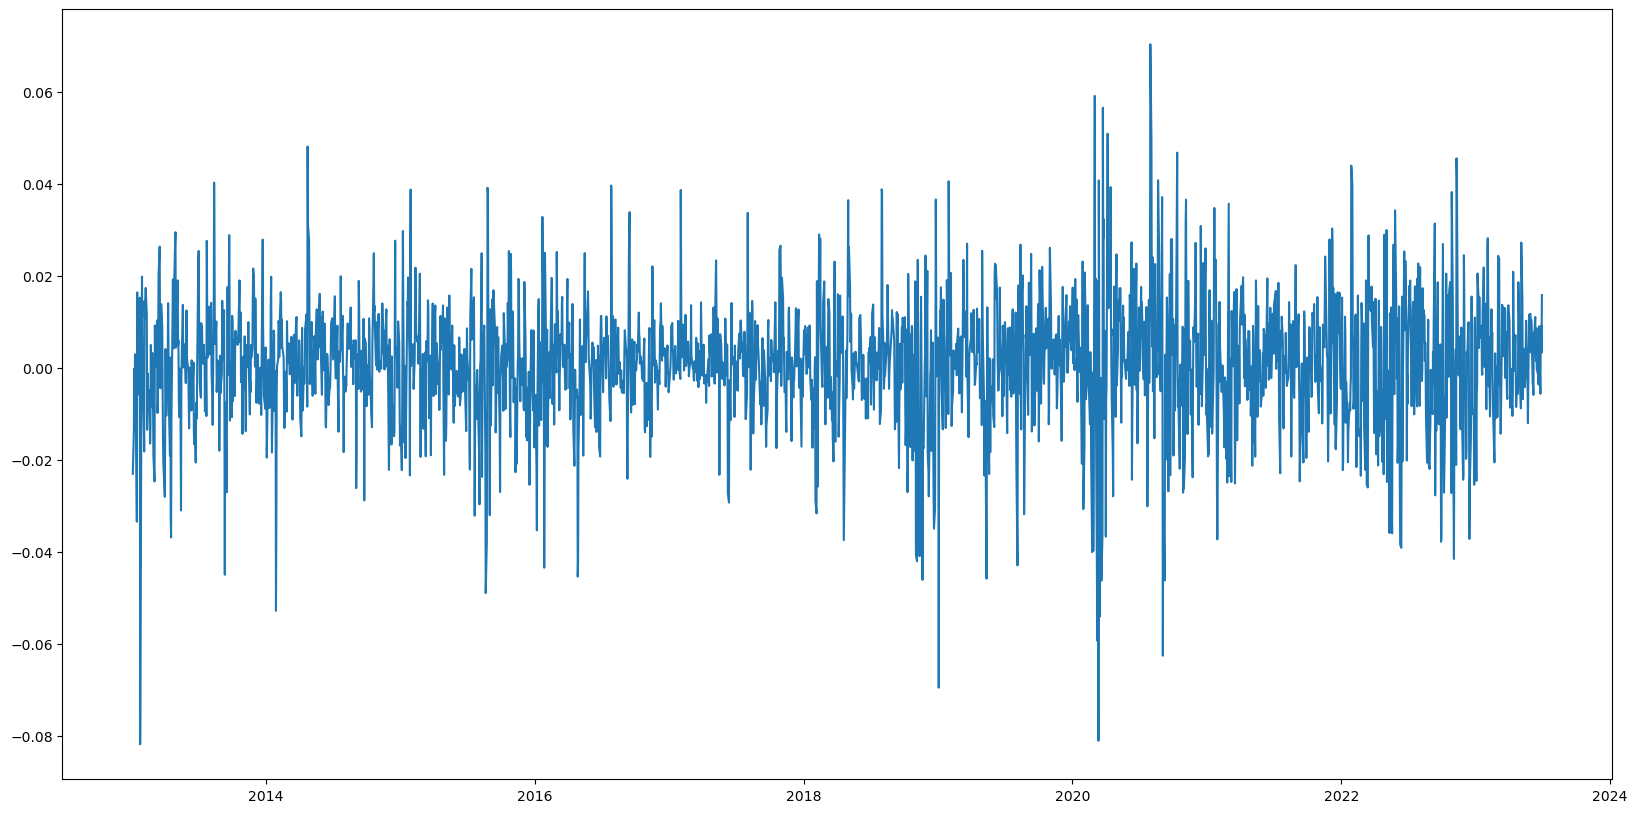

In [42]:
#Let's visualize in graph
plt.figure(figsize=(20,10))
plt.plot(ts_log_moving_avg)
plt.show()

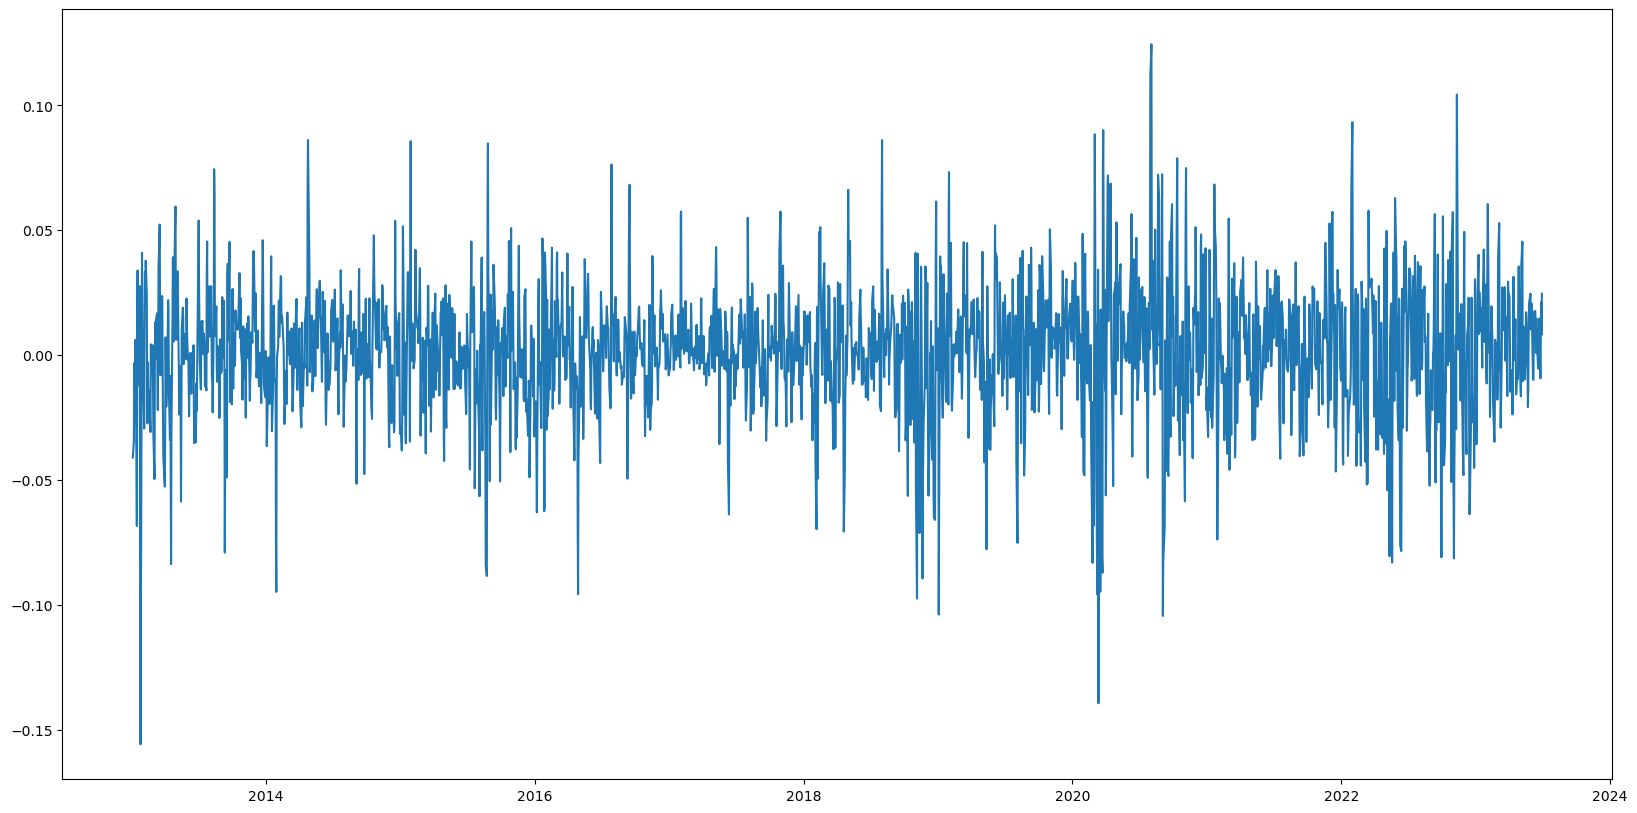

In [198]:
#We have done differencing with lag 2 to remove trend and seasonality
ts_log_ma_diff = ts_log - ts_log.shift(periods = 2) #lag=2
plt.figure(figsize=(20,10))
plt.plot(ts_log_ma_diff)
plt.show()

In [199]:
#Drop the null values
ts_log_ma_diff.dropna(inplace=True)

In [200]:
#Final ADF Test

print('Results of Dickey-Fuller Test:')
adf_final = adfuller(ts_log_ma_diff, autolag='AIC')
final_output = pd.Series(adf_final[0:4], index=['Test Statistic', 'P-value', 'Lags Used', 'Number of Observations Used'])
for key, value in adf_final[4].items():
    final_output['Critical Value (%s)'%key] = value
print(final_output)

Results of Dickey-Fuller Test:
Test Statistic                -9.402540e+00
P-value                        6.132448e-16
Lags Used                      2.600000e+01
Number of Observations Used    2.613000e+03
Critical Value (1%)           -3.432855e+00
Critical Value (5%)           -2.862647e+00
Critical Value (10%)          -2.567359e+00
dtype: float64


In [201]:
#Now let's find p and q using ACF for q value and PACF for p value
#Method to use - ARIMA (Auto-Regressive Integrated Moving Average)

from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_ma_diff, nlags=26)
lag_pacf = pacf(ts_log_ma_diff, nlags=26, method='ols')

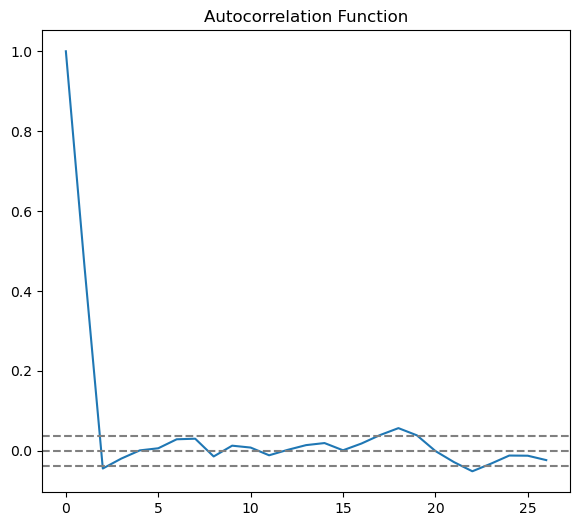

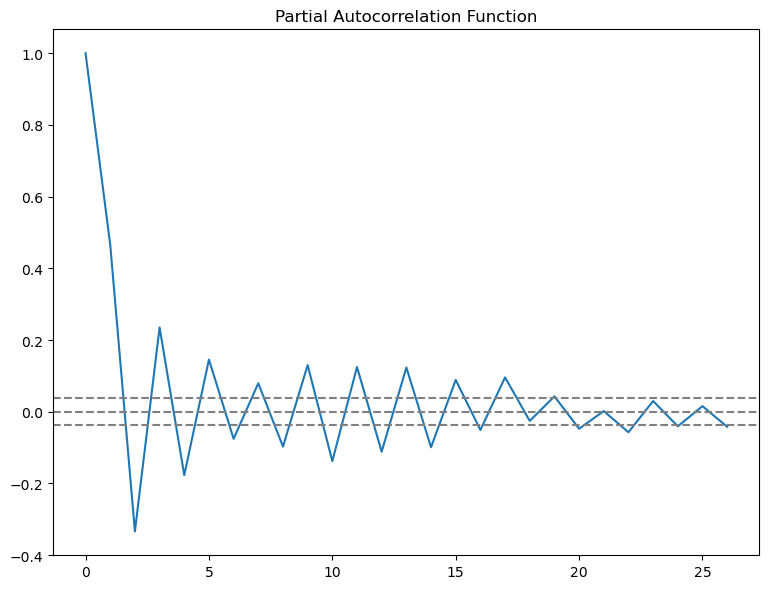

In [202]:
#ACF plot - q value

plt.subplot(121) 
plt.plot(lag_acf)

plt.axhline(y=0, linestyle='--', color='gray')

plt.axhline(y=-1.96/np.sqrt(len(ts_log_ma_diff)), linestyle='--', color='gray')

plt.axhline(y=1.96/np.sqrt(len(ts_log_ma_diff)), linestyle='--', color='gray')

plt.title('Autocorrelation Function')
plt.show()

#PACF plot - p value

plt.subplot(122)
plt.plot(lag_pacf)

plt.axhline(y=0, linestyle='--', color='gray')

plt.axhline(y=-1.96/np.sqrt(len(ts_log_ma_diff)), linestyle='--', color='gray')

plt.axhline(y=1.96/np.sqrt(len(ts_log_ma_diff)), linestyle='--', color='gray')

plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.show()

In [208]:
#Now create the model using p,d,q values where p = 2, d = 2 (lags used), q = 2
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

model = sm.tsa.arima.ARIMA(ts_log_ma_diff, order=(2, 2, 2)) 

In [209]:
#Fit the model
results_AR = model.fit()

In [210]:
results_AR.fittedvalues

Date
2013-01-04    0.000000
2013-01-07   -0.061429
2013-01-08   -0.027347
2013-01-09    0.019216
2013-01-10   -0.014606
                ...   
2023-06-26    0.002018
2023-06-27   -0.005018
2023-06-28    0.016141
2023-06-29    0.010967
2023-06-30    0.009847
Length: 2640, dtype: float64

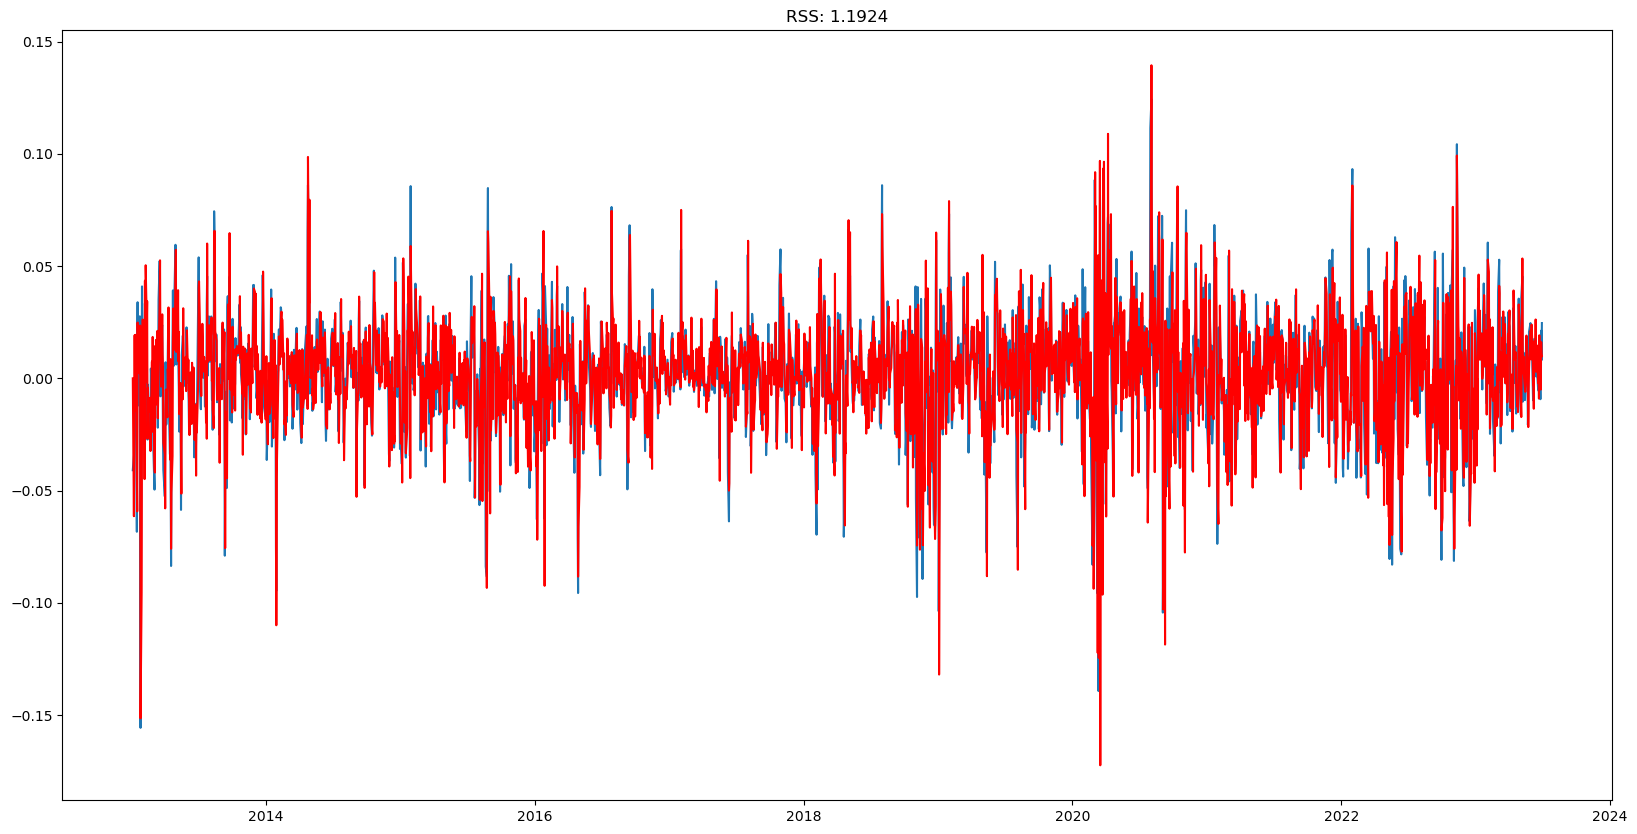

In [211]:
#Visualize the result
plt.figure(figsize=(20,10))
plt.plot(ts_log_ma_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues - ts_log_ma_diff)**2))
plt.show()

In [212]:
print(results_AR.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2640
Model:                 ARIMA(2, 2, 2)   Log Likelihood                6422.998
Date:                Wed, 12 Jul 2023   AIC                         -12835.996
Time:                        23:05:59   BIC                         -12806.607
Sample:                             0   HQIC                        -12825.356
                               - 2640                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7051      0.012    -60.542      0.000      -0.728      -0.682
ar.L2         -0.3386      0.012    -28.664      0.000      -0.362      -0.315
ma.L1         -0.0002    120.956  -1.64e-06      1.0

In [213]:
#Let's play with p and q values and check the result ----> p = 2, d = 2, q = 0
model1 = sm.tsa.arima.ARIMA(ts_log_ma_diff, order=(2, 2, 0))

In [214]:
results_AR1 = model1.fit() 

results_AR1.fittedvalues

Date
2013-01-04    0.000000
2013-01-07   -0.061429
2013-01-08   -0.027347
2013-01-09    0.021310
2013-01-10   -0.019965
                ...   
2023-06-26    0.014376
2023-06-27   -0.014344
2023-06-28    0.023405
2023-06-29    0.012194
2023-06-30    0.008052
Length: 2640, dtype: float64

In [215]:
print(results_AR1.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2640
Model:                 ARIMA(2, 2, 0)   Log Likelihood                5640.681
Date:                Wed, 12 Jul 2023   AIC                         -11275.362
Time:                        23:06:22   BIC                         -11257.728
Sample:                             0   HQIC                        -11268.978
                               - 2640                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4237      0.009    -45.373      0.000      -0.442      -0.405
ar.L2         -0.5937      0.010    -58.309      0.000      -0.614      -0.574
sigma2         0.0008   1.31e-05     62.001      0.0

In [216]:
#Now change to p = 0, d = 2, q = 2
model2 = sm.tsa.arima.ARIMA(ts_log_ma_diff, order=(0, 2, 2))

In [217]:
results_AR2 = model2.fit() 

results_AR2.fittedvalues

Date
2013-01-04    0.000000
2013-01-07   -0.061429
2013-01-08   -0.027347
2013-01-09    0.027726
2013-01-10   -0.034984
                ...   
2023-06-26   -0.002577
2023-06-27   -0.015991
2023-06-28    0.030678
2023-06-29    0.011873
2023-06-30    0.004354
Length: 2640, dtype: float64

In [218]:
print(results_AR2.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2640
Model:                 ARIMA(0, 2, 2)   Log Likelihood                5833.411
Date:                Wed, 12 Jul 2023   AIC                         -11660.822
Time:                        23:06:47   BIC                         -11643.189
Sample:                             0   HQIC                        -11654.438
                               - 2640                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0024      0.686     -0.003      0.997      -1.348       1.343
ma.L2         -0.9976      0.685     -1.456      0.145      -2.340       0.345
sigma2         0.0007      0.000      1.455      0.1

In [219]:
results_AR1.forecast

<bound method MLEResults.forecast of <statsmodels.tsa.arima.model.ARIMAResultsWrapper object at 0x000001A77098BD00>>

In [220]:
forecast_upcoming_days = results_AR1.forecast(3)
forecast_upcoming_days

2640    0.044645
2641    0.045558
2642    0.052497
Name: predicted_mean, dtype: float64

In [221]:
np.exp(forecast_upcoming_days)

2640    1.045657
2641    1.046612
2642    1.053899
Name: predicted_mean, dtype: float64

In [222]:
predictions_ARIMA_diff = pd.Series(results_AR2.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Date
2013-01-04    0.000000
2013-01-07   -0.061429
2013-01-08   -0.027347
2013-01-09    0.027726
2013-01-10   -0.034984
dtype: float64

In [223]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Date
2013-01-04    0.000000
2013-01-07   -0.061429
2013-01-08   -0.088776
2013-01-09   -0.061050
2013-01-10   -0.096034
dtype: float64

In [224]:
predictions_ARIMA_log = pd.Series(ts_log.iloc[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2013-01-02    2.975949
2013-01-03    2.975949
2013-01-04    2.975949
2013-01-07    2.914520
2013-01-08    2.887173
dtype: float64